# Haberman's Survival Data Set

Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute) 
    1. for the patient survived 5 years or longer 
    2. for the patient died within 5 year

1. High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
2. Objective of the EDA.
3. Perform Univaraite analysis - PDF, CDF, Boxplot, Voilin plots
4. Perform Bi-variate analysis - scatter plots, pair-plots
5. Explain the observation


In [1]:
import os
print(os.getcwd())

C:\Users\Admin\Documents\Python Scripts


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("haberman.csv",header=None,names=['Age','Year','axil','Surv'])

In [4]:
df.head()

,Age,Year,axil,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
df.describe()

,Age,Year,axil,Surv
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Number of Data points in each column are equal so there is no missing data

In [16]:
df.columns

Index(['Age', 'Year', 'axil', 'Surv'], dtype='object')

In [29]:
print(df.shape)

(306, 4)


In [30]:
df["Surv"].value_counts()

1    225
2     81
Name: Surv, dtype: int64

Haberman's Survival is an Imbalanced dataset as the number of data points for Surv class 1 and class 2 are different 

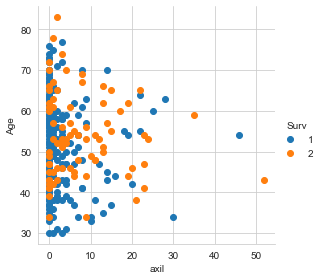

In [31]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Surv", height=4).map(plt.scatter, "axil", "Age").add_legend();
plt.show();

Data is scattered all over with lot of overlapping. Separating the 2 Surv classes is hard. But a small conclusion can be made that Patients with less than 5 Axils and Age more than 32 have Surv 1.

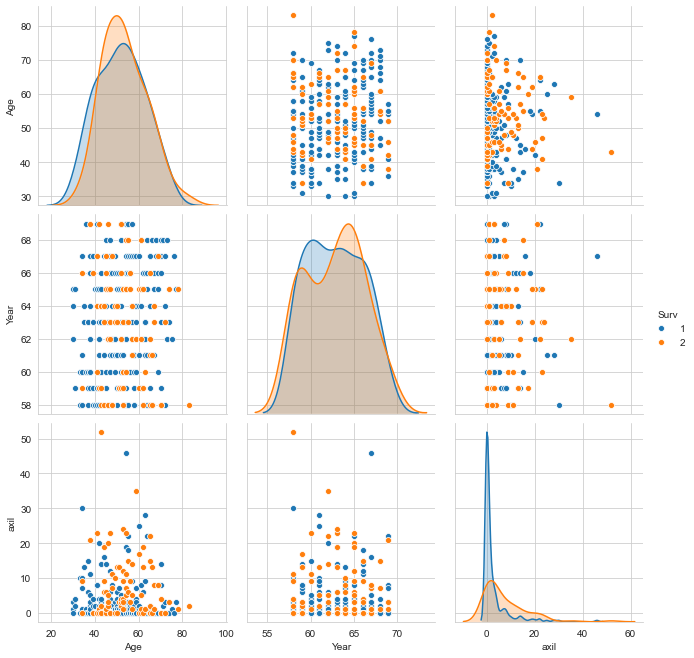

In [36]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Surv", height=3);
plt.show()

In [39]:
# We separated the 2 classes
Surv1 = df.loc[df["Surv"] == 1];
Surv2 = df.loc[df["Surv"] == 2];

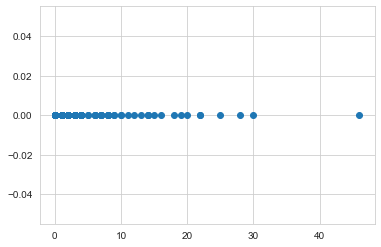

In [44]:
plt.plot(Surv1["axil"], np.zeros_like(Surv1['axil']), 'o')
plt.show()

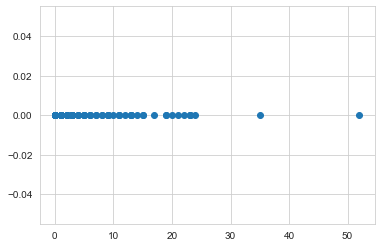

In [43]:
plt.plot(Surv2["axil"], np.zeros_like(Surv2['axil']), 'o')
plt.show()

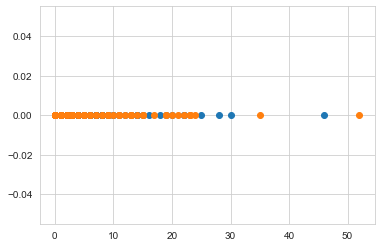

In [45]:
plt.plot(Surv1["axil"], np.zeros_like(Surv1['axil']), 'o')
plt.plot(Surv2["axil"], np.zeros_like(Surv2['axil']), 'o')
plt.show()

The Surv Class 1 and Class 2 for axil are extremely overlapping. No conclusion can be drawn of the
overlapping data 

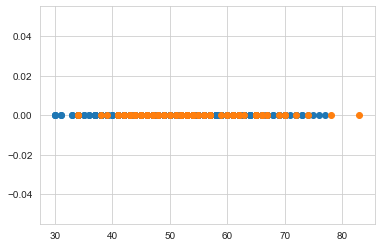

In [46]:
plt.plot(Surv1["Age"], np.zeros_like(Surv1['Age']), 'o')
plt.plot(Surv2["Age"], np.zeros_like(Surv2['Age']), 'o')
plt.show()

As discussed earlier, a small conclusion can be made that Patients with less than 5 Axils 
and Age more than 32 have Surv 1.

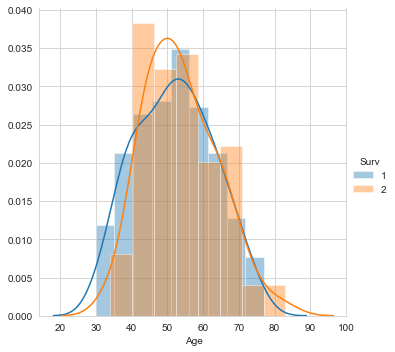

In [49]:
sns.FacetGrid(df, hue="Surv", height=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

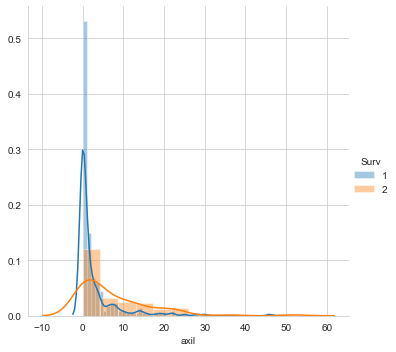

In [50]:
sns.FacetGrid(df, hue="Surv", height=5) \
   .map(sns.distplot, "axil") \
   .add_legend();
plt.show();

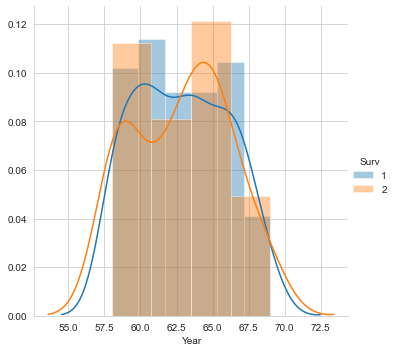

In [51]:
sns.FacetGrid(df, hue="Surv", height=5) \
   .map(sns.distplot, "Year") \
   .add_legend();
plt.show();

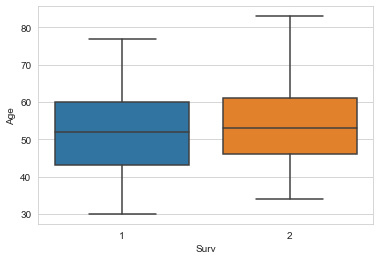

In [53]:
sns.boxplot(x='Surv',y='Age', data=df)
plt.show()

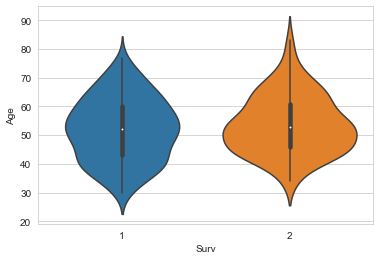

In [61]:
sns.violinplot(x="Surv", y="Age", data=df, size=8)
plt.show()

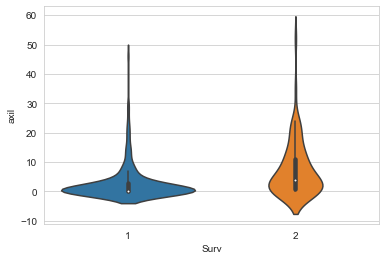

In [63]:
sns.violinplot(x="Surv", y="axil", data=df, size=8)
plt.show()

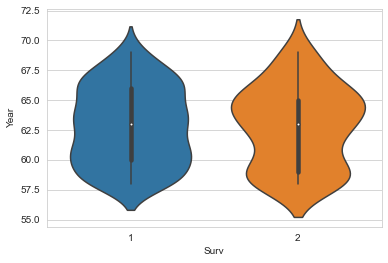

In [64]:
sns.violinplot(x="Surv", y="Year", data=df, size=8)
plt.show()

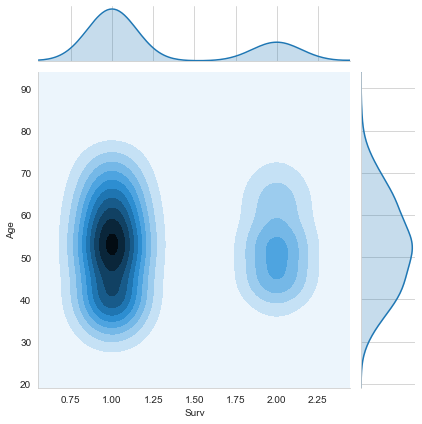

In [57]:
sns.jointplot(x="Surv", y="Age", data=df, kind="kde");
plt.show();


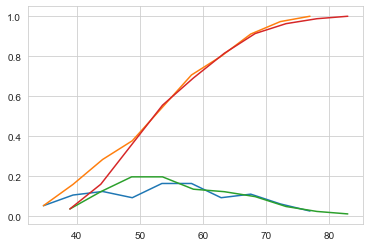

In [58]:
# CDF and PDF
# Surv1
counts, bin_edges = np.histogram(Surv1['Age'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#Surv2
counts, bin_edges = np.histogram(Surv2['Age'], bins=10, density = True)                                
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# Conclusion:
As discussed, the data is completely overlapping. No conclusions can be made from Year and Axil. But little conclusion can be drawn from Age. 
Patients with less than 5 Axils and Age more than 32 have Surv 1.